# ETL de Electric and Alternative Fuel Charging Station

## Importamos librerias necesarias

In [2]:
import os
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Cargamos el archivo a analizar

In [3]:
df = pd.read_csv("./Datasets/Electric and Alternative Fuel Charging Stations.csv")

C:\Users\AGaby\AppData\Local\Temp\ipykernel_13424\3610109458.py:1: DtypeWarning: Columns (6,16,20,31,33,36,39,40,41,43,46,52,53,55,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Datasets/Electric and Alternative Fuel Charging Stations.csv")


### Revisión del dataset

In [4]:
df.shape
# Contiene 70406 filas y 65 columnas

(70406, 65)

In [5]:
# Revisamos las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    70406 non-null  object 
 1   Station Name                      70406 non-null  object 
 2   Street Address                    70405 non-null  object 
 3   Intersection Directions           4492 non-null   object 
 4   City                              70406 non-null  object 
 5   State                             70406 non-null  object 
 6   ZIP                               70405 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     65204 non-null  object 
 9   Status Code                       70406 non-null  object 
 10  Expected Date                     1218 non-null   object 
 11  Groups With Access Code           70406 non-null  object 
 12  Acce

<Axes: >

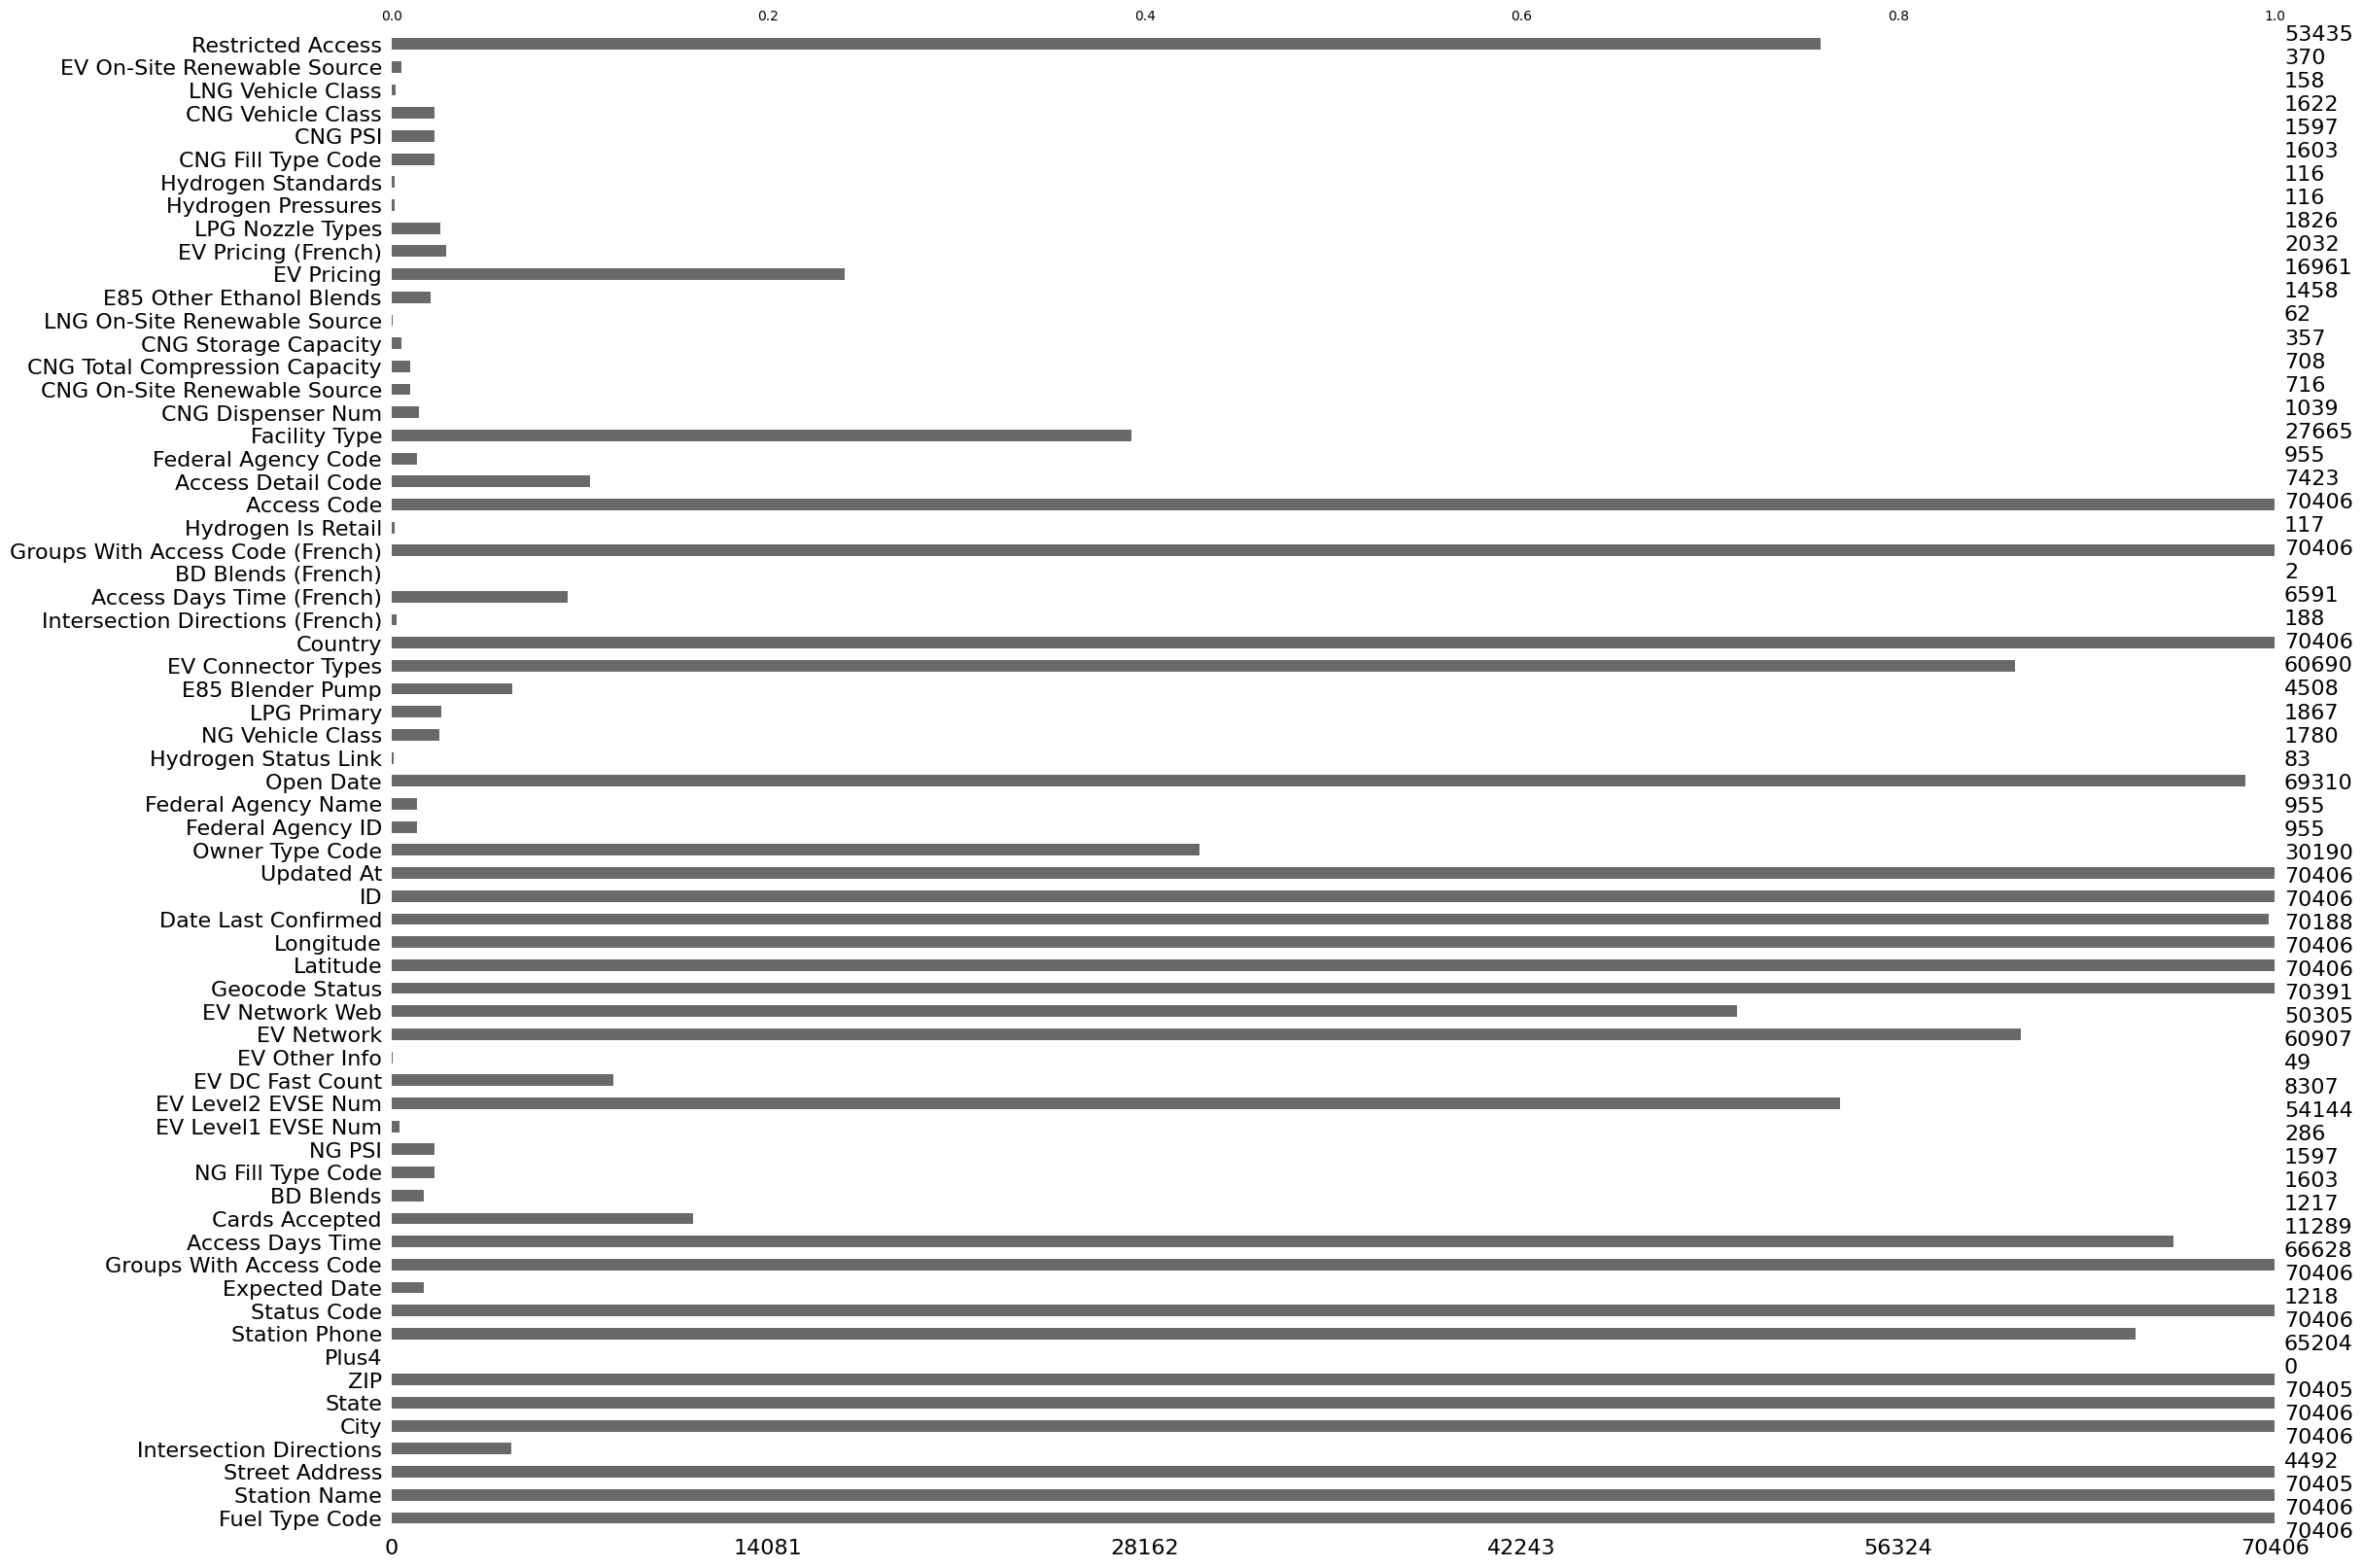

In [6]:
# Revisamos los valores faltantes
msno.bar(df)

In [7]:
# Seleccionamos solo las columnas con datos faltantes y las ordenamos
sorted_columns = df.isnull().sum().sort_values(ascending=False)

# Obtenemos los nombres de las columnas y la cantidad total de datos faltantes
for column, missing_count in sorted_columns.items():
    print(f"{column}: {missing_count} datos faltantes")

Plus4: 70406 datos faltantes
BD Blends (French): 70404 datos faltantes
EV Other Info: 70357 datos faltantes
LNG On-Site Renewable Source: 70344 datos faltantes
Hydrogen Status Link: 70323 datos faltantes
Hydrogen Standards: 70290 datos faltantes
Hydrogen Pressures: 70290 datos faltantes
Hydrogen Is Retail: 70289 datos faltantes
LNG Vehicle Class: 70248 datos faltantes
Intersection Directions (French): 70218 datos faltantes
EV Level1 EVSE Num: 70120 datos faltantes
CNG Storage Capacity: 70049 datos faltantes
EV On-Site Renewable Source: 70036 datos faltantes
CNG Total Compression Capacity: 69698 datos faltantes
CNG On-Site Renewable Source: 69690 datos faltantes
Federal Agency Name: 69451 datos faltantes
Federal Agency ID: 69451 datos faltantes
Federal Agency Code: 69451 datos faltantes
CNG Dispenser Num: 69367 datos faltantes
BD Blends: 69189 datos faltantes
Expected Date: 69188 datos faltantes
E85 Other Ethanol Blends: 68948 datos faltantes
CNG PSI: 68809 datos faltantes
NG PSI: 68809

## Análisis de variables:
 
Dada la cantidad de valores faltantes, y condierando el diccionario de las variables, se recomienda eliminar las siguientes columnas: 

- Intersection Directions: Tiene una gran cantidad de valores faltantes (NaN) y puede no ser crucial para el análisis.

- Plus4: Todos los valores son NaN, por lo que no contiene información útil.

- Expected Date: Tiene muchos valores faltantes.

Estas columnas tienen muchos valores faltantes o contienen información que puede no ser relevante para el análisis: 
    - BD Blends: Mezclas de BD (valor del combustible de origen biológico) disponibles.
    
    - NG Fill Type Code: Código del tipo de carga de gas natural.
    
    - NG PSI: Presión de llenado de gas natural.
    
    - EV Level1 EVSE Num: Número de puntos de carga de vehículos eléctricos de nivel 1.
    
    - EV DC Fast Count:  Cantidad de puntos de carga rápida para vehículos eléctricos.
    
    - EV Other Info: Otra información relevante sobre la carga de vehículos eléctricos. 
    
    - Hydrogen Status Link: Enlace de estado del hidrógeno.
    
    - NG Vehicle Class: Clase de vehículos a gas natural.
    
    - LPG Primary: Tipo de gas licuado de petróleo (LPG) primario.
    
    - E85 Blender Pump:  Bomba mezcladora de E85 (etanol) disponible.
    
    - Intersection Directions (French):  Instrucciones para llegar a la estación en francés.
    
    - Access Days Time (French): Días y horarios de acceso a la estación en francés.
    
    - BD Blends (French): Mezclas de BD (valor del combustible de origen biológico) disponibles en francés.  
    
    - Hydrogen Is Retail:  Indicación de si el hidrógeno está disponible para venta al público.
    
    - Access Detail Code:  Código de acceso a la estación.
    
    - Federal Agency Code:  Código de la agencia federal. 
    
    - CNG Dispenser Num:  Número de dispensadores de gas natural comprimido (GNC)
    
    - CNG On-Site Renewable Source: Fuente renovable de gas natural comprimido (GNC) en el sitio.
    
    - CNG Total Compression Capacity: Capacidad total de compresión de gas natural comprimido (GNC).  
    
    - CNG Storage Capacity:  Capacidad de almacenamiento de gas natural comprimido (GNC).
    
    - LNG On-Site Renewable Source: Fuente renovable de gas natural licuado (GNL) en el sitio.
    
    - E85 Other Ethanol Blends: Otras mezclas de etanol E85 disponibles.
    
    - EV Pricing (French): Información sobre la tarificación de la carga de vehículos eléctricos en francés.
    
    - LPG Nozzle Types:  Tipos de boquillas de gas licuado de petróleo (GPL).
    
    - Hydrogen Pressures:  Presiones de hidrógeno en la estación.
    
    - Hydrogen Standards:  Estándares de hidrógeno utilizados en la estación.
    
    - CNG Fill Type Code: Código del tipo de llenado de gas natural comprimido (GNC)
    
    - CNG PSI:  Presión de llenado de gas natural comprimido (CNG).
    
    - EV On-Site Renewable Source:  Fuente renovable de energía eléctrica en el sitio para cargar vehículos eléctricos.

OTROS:
- Federal Agency ID, Federal Agency Name, Hydrogen Status Link: Tienen muchos valores faltantes y podrían no ser relevantes para el análisis.

- Owner Type Code: Tiene una cantidad considerable de valores faltantes.

- Restricted Access: Tiene una cantidad considerable de valores faltantes.

In [8]:
columns_to_drop = [
    'Intersection Directions', 'Plus4', 'Expected Date', 'BD Blends', 'NG Fill Type Code', 
    'NG PSI', 'EV Level1 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'Hydrogen Status Link',
    'NG Vehicle Class', 'LPG Primary', 'E85 Blender Pump', 'Intersection Directions (French)',
    'Access Days Time (French)', 'BD Blends (French)', 'Hydrogen Is Retail', 'Access Detail Code',
    'Federal Agency Code', 'CNG Dispenser Num', 'CNG On-Site Renewable Source',
    'CNG Total Compression Capacity', 'CNG Storage Capacity', 'LNG On-Site Renewable Source',
    'E85 Other Ethanol Blends', 'EV Pricing (French)', 'LPG Nozzle Types', 'Hydrogen Pressures',
    'Hydrogen Standards', 'CNG Fill Type Code', 'CNG PSI', 'EV On-Site Renewable Source',
    'Federal Agency ID', 'Federal Agency Name', 'Hydrogen Status Link', 'Owner Type Code',
    'Restricted Access'
]

df_cleaned = df.drop(columns=columns_to_drop)


In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    70406 non-null  object 
 1   Station Name                      70406 non-null  object 
 2   Street Address                    70405 non-null  object 
 3   City                              70406 non-null  object 
 4   State                             70406 non-null  object 
 5   ZIP                               70405 non-null  object 
 6   Station Phone                     65204 non-null  object 
 7   Status Code                       70406 non-null  object 
 8   Groups With Access Code           70406 non-null  object 
 9   Access Days Time                  66628 non-null  object 
 10  Cards Accepted                    11289 non-null  object 
 11  EV Level2 EVSE Num                54144 non-null  float64
 12  EV N

<Axes: >

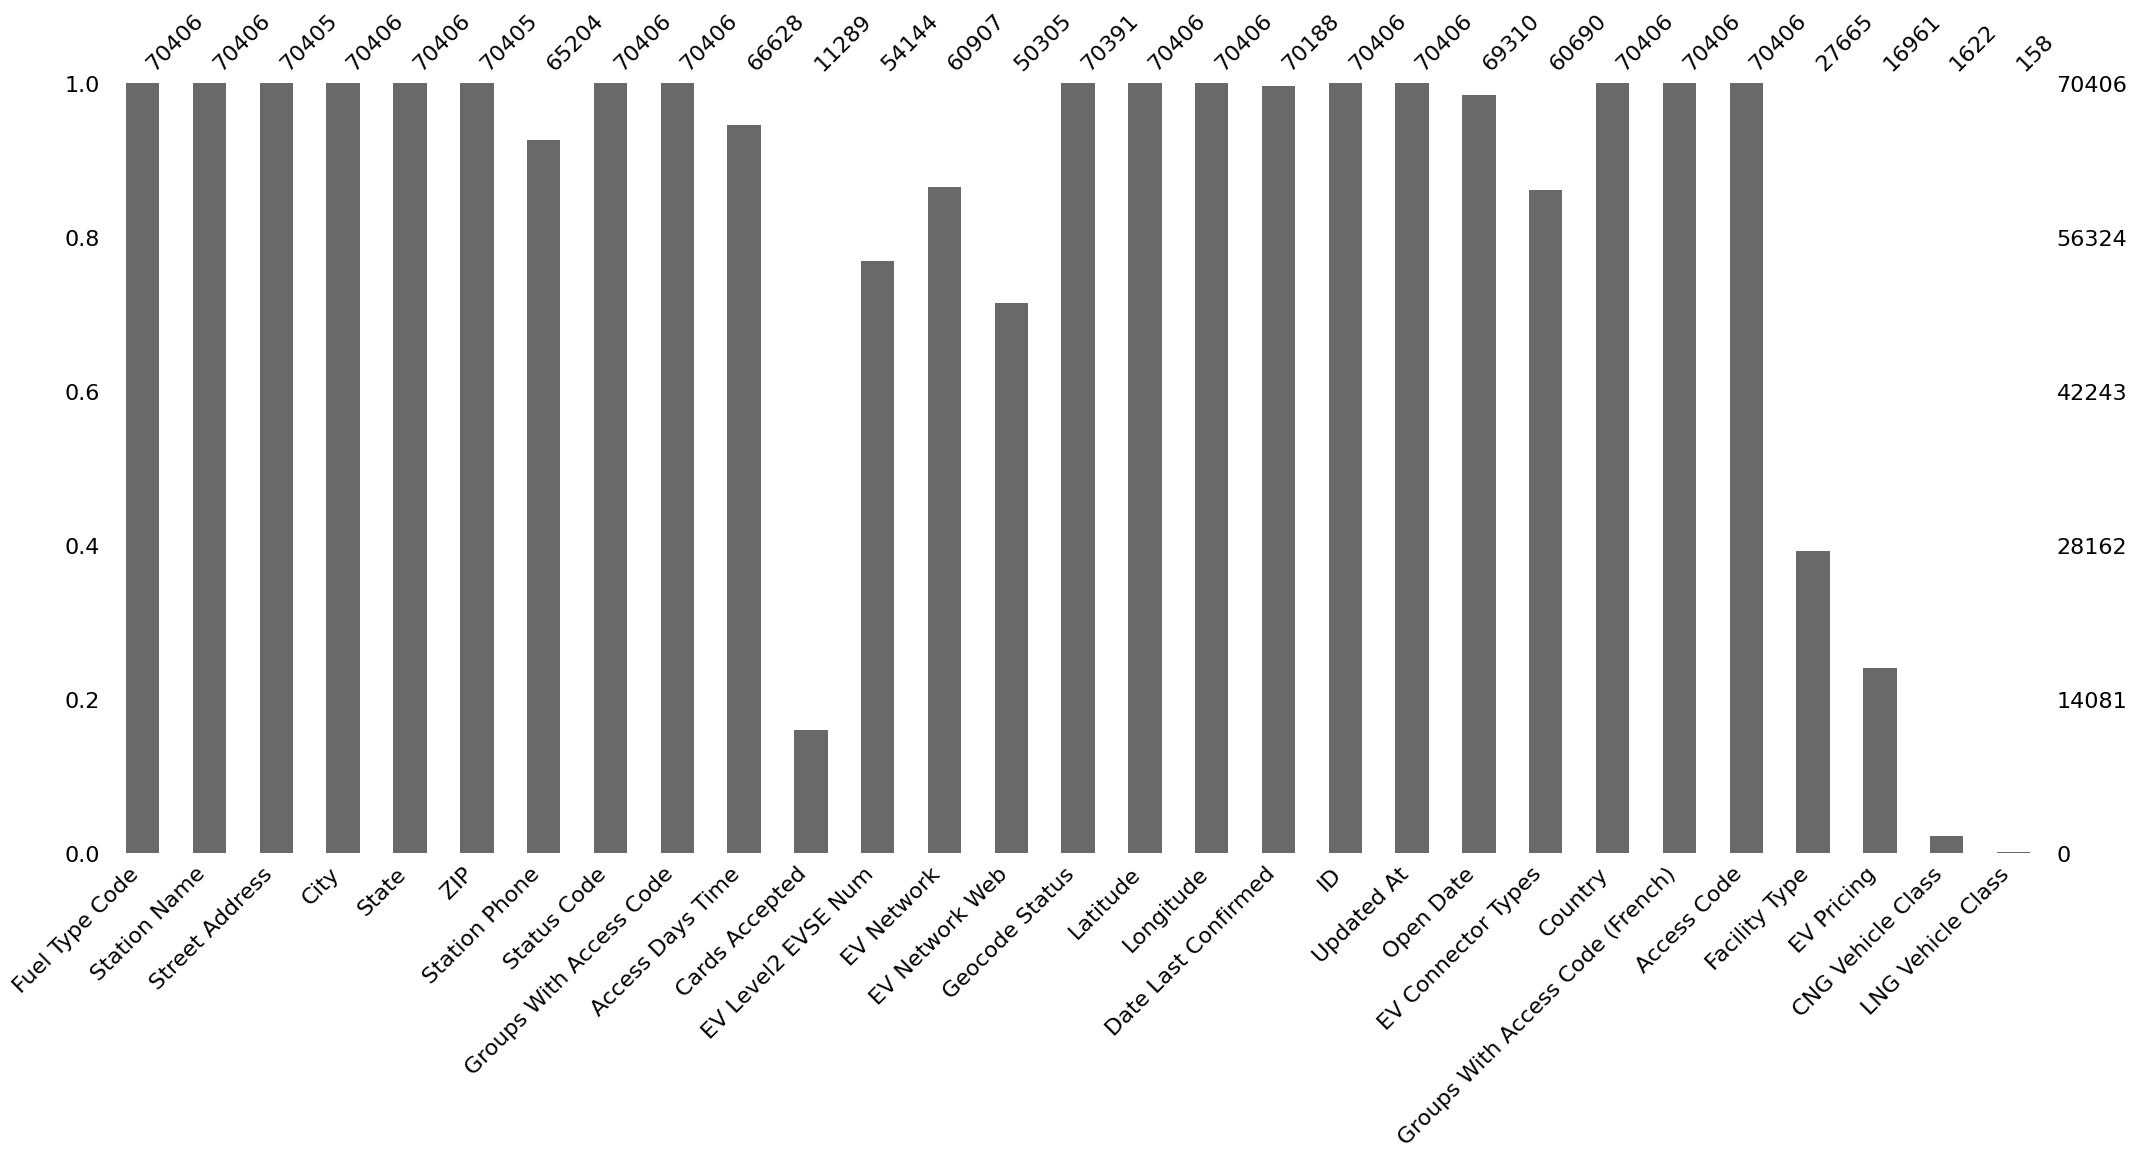

In [10]:
msno.bar(df_cleaned)
# revisamos el resultado de esta primera limpieza

Podemos notar que las siguientes variables presentan gran cantidad de datos faltantes:
- **Cards Accepted**: Tarjetas de pago aceptadas en la estación.
- **Facility Type**: Tipo de instalación (por ejemplo, estación de servicio, aparcamiento, etc.).
- **EV Pricing**: Información sobre la tarificación de la carga de vehículos eléctricos.
- **CNG Vehicle Class**: Clase de vehículos para gas natural comprimido (CNG).
- **LNG Vehicle Class**: Clase de vehículos para gas natural licuado (LNG).


In [11]:
columns_selected = ['Cards Accepted', 'Facility Type', 'EV Pricing', 'CNG Vehicle Class', 'LNG Vehicle Class']

# Eliminar las columnas adicionales especificadas
df_cleaned = df_cleaned.drop(columns=columns_selected, inplace=False)

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    70406 non-null  object 
 1   Station Name                      70406 non-null  object 
 2   Street Address                    70405 non-null  object 
 3   City                              70406 non-null  object 
 4   State                             70406 non-null  object 
 5   ZIP                               70405 non-null  object 
 6   Station Phone                     65204 non-null  object 
 7   Status Code                       70406 non-null  object 
 8   Groups With Access Code           70406 non-null  object 
 9   Access Days Time                  66628 non-null  object 
 10  EV Level2 EVSE Num                54144 non-null  float64
 11  EV Network                        60907 non-null  object 
 12  EV N

In [13]:
df_cleaned.shape

(70406, 24)

In [14]:
# Podemos revisar las columnas con valores faltantes
df_cleaned.isnull().sum()

Fuel Type Code                          0
Station Name                            0
Street Address                          1
City                                    0
State                                   0
ZIP                                     1
Station Phone                        5202
Status Code                             0
Groups With Access Code                 0
Access Days Time                     3778
EV Level2 EVSE Num                  16262
EV Network                           9499
EV Network Web                      20101
Geocode Status                         15
Latitude                                0
Longitude                               0
Date Last Confirmed                   218
ID                                      0
Updated At                              0
Open Date                            1096
EV Connector Types                   9716
Country                                 0
Groups With Access Code (French)        0
Access Code                       

Si bien hay algunas columnas con valores faltantes, son un numero bajo en relación con el total de datos.

In [22]:
# Se seleccionan las columnas a visualizar (las que presentan altos valores de faltantes)
selected_columns = ['Access Days Time', 'EV Level2 EVSE Num', 'EV Network', 'EV Network Web'] 

# Mostrar algunas filas de las columnas seleccionadas
print(df_cleaned[selected_columns].sample(10))

                                        Access Days Time  EV Level2 EVSE Num  \
39551                                     24 hours daily                 2.0   
15530                 24 hours daily; for Tesla use only                 NaN   
64113  MO: Not Specified; TU: Not Specified; WE: Not ...                 2.0   
58048                                     24 hours daily                 NaN   
3255                                      24 hours daily                 NaN   
11211                                      7am-8pm daily                 NaN   
60564                                     24 hours daily                 NaN   
38467                                     24 hours daily                 2.0   
64959  MO: 12:00am-12:00am; TU: 12:00am-12:00am; WE: ...                 4.0   
62515                                     24 hours daily                 2.0   

                EV Network                      EV Network Web  
39551  ChargePoint Network         http://www.chargepo

In [18]:
df_cleaned.to_csv('./Datasets_clean/Electric_and_Alternative_Fuel_Charging_Stations.csv')